In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score ,  mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
URL = 'electricity.csv'
df = pd.read_csv(URL)

In [3]:
print("Return first 5 rows.","\n")
df.head()

Return first 5 rows. 



,Start time UTC,End time UTC,Start time UTC+03:00,End time UTC+03:00,Electricity consumption in Finland
0,2015-12-31 21:00:00,2015-12-31 22:00:00,2016-01-01 00:00:00,2016-01-01 01:00:00,10800.0
1,2015-12-31 22:00:00,2015-12-31 23:00:00,2016-01-01 01:00:00,2016-01-01 02:00:00,10431.0
2,2015-12-31 23:00:00,2016-01-01 00:00:00,2016-01-01 02:00:00,2016-01-01 03:00:00,10005.0
3,2016-01-01 00:00:00,2016-01-01 01:00:00,2016-01-01 03:00:00,2016-01-01 04:00:00,9722.0
4,2016-01-01 01:00:00,2016-01-01 02:00:00,2016-01-01 04:00:00,2016-01-01 05:00:00,9599.0


In [4]:
print("Return last 5 rows.","\n")
df.tail()

Return last 5 rows. 



,Start time UTC,End time UTC,Start time UTC+03:00,End time UTC+03:00,Electricity consumption in Finland
52961,2021-12-31 16:00:00,2021-12-31 17:00:00,2021-12-31 19:00:00,2021-12-31 20:00:00,11447.0
52962,2021-12-31 17:00:00,2021-12-31 18:00:00,2021-12-31 20:00:00,2021-12-31 21:00:00,11237.0
52963,2021-12-31 18:00:00,2021-12-31 19:00:00,2021-12-31 21:00:00,2021-12-31 22:00:00,10914.0
52964,2021-12-31 19:00:00,2021-12-31 20:00:00,2021-12-31 22:00:00,2021-12-31 23:00:00,10599.0
52965,2021-12-31 20:00:00,2021-12-31 21:00:00,2021-12-31 23:00:00,2022-01-01 00:00:00,10812.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Start time UTC                      52966 non-null  object 
 1   End time UTC                        52966 non-null  object 
 2   Start time UTC+03:00                52966 non-null  object 
 3   End time UTC+03:00                  52966 non-null  object 
 4   Electricity consumption in Finland  52966 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.0+ MB


In [6]:
print(df.describe(), "\n")

       Electricity consumption in Finland
count                        52966.000000
mean                          9488.750519
std                           1576.241673
min                           5341.000000
25%                           8322.000000
50%                           9277.000000
75%                          10602.000000
max                          15105.000000 



In [7]:
del df["Start time UTC"]
del df["End time UTC"]
del df["Start time UTC+03:00"]
df.rename(columns={"End time UTC+03:00":"DateTime","Electricity consumption in Finland":"Consumption"},inplace=True)
print(df.head(5))

              DateTime  Consumption
0  2016-01-01 01:00:00      10800.0
1  2016-01-01 02:00:00      10431.0
2  2016-01-01 03:00:00      10005.0
3  2016-01-01 04:00:00       9722.0
4  2016-01-01 05:00:00       9599.0


In [8]:
dataset = df
dataset["Month"] = pd.to_datetime(df["DateTime"]).dt.month
dataset["Year"] = pd.to_datetime(df["DateTime"]).dt.year
dataset["Date"] = pd.to_datetime(df["DateTime"]).dt.date
dataset["Time"] = pd.to_datetime(df["DateTime"]).dt.time
dataset["Week"] = pd.to_datetime(df["DateTime"]).dt.isocalendar().week
dataset["Day"] = pd.to_datetime(df["DateTime"]).dt.day_name()
dataset = df.set_index("DateTime")
dataset.index = pd.to_datetime(dataset.index)

In [9]:
# Check for NaN values
print("NaN values in dataset:")
print(dataset.isna().sum())



NaN values in dataset:
Consumption    0
Month          0
Year           0
Date           0
Time           0
Week           0
Day            0
dtype: int64


In [10]:

# Drop rows with NaN values
dataset.dropna(inplace=True)


In [11]:
# Prepare features and target variable
X = dataset[['Month', 'Year', 'Week']]
y = dataset['Consumption']

In [12]:

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:

# Convert to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')


In [14]:

# Reshape data (not needed for these models but included for completeness)
X_train = np.array(X_train).reshape(-1, 3)
X_test = np.array(X_test).reshape(-1, 3)


In [15]:

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
print("Random Forest MSE:", rf_mse)

Random Forest MSE: 507150.39188511326


In [16]:
# Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr_model.fit(X_train, y_train)
gbr_pred = gbr_model.predict(X_test)
gbr_mse = mean_squared_error(y_test, gbr_pred)
print("Gradient Boosting MSE:", gbr_mse)

Gradient Boosting MSE: 590269.967750496


In [17]:
# K-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

In [18]:
# Ensemble Predictions
ensemble_pred = (rf_pred + gbr_pred + knn_pred ) / 3

ensemble_mse = mean_squared_error(y_test, ensemble_pred)
print("Ensemble MSE:", ensemble_mse)

Ensemble MSE: 525393.7620631892


In [19]:
# Calculate R2 Score
ensemble_r2 = r2_score(y_test, ensemble_pred)
print("Ensemble R2 Score:", ensemble_r2)

Ensemble R2 Score: 0.7909469084832579


In [20]:
# Calculate RMSE for Ensemble
ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_pred))
print("Ensemble RMSE:", ensemble_rmse)

Ensemble RMSE: 724.8405080175839


In [21]:
# Calculate MAE for Ensemble
ensemble_mae = mean_absolute_error(y_test, ensemble_pred)
print("Ensemble MAE:", ensemble_mae)

Ensemble MAE: 609.0743340043027


In [22]:

# Create DataFrame for model predictions
predictions_df = pd.DataFrame({
    'Random Forest': rf_pred,
    'Gradient Boosting': gbr_pred,
    'K-Nearest Neighbors': knn_pred,
    'Ensemble': ensemble_pred,
    'Actual': y_test.values
})


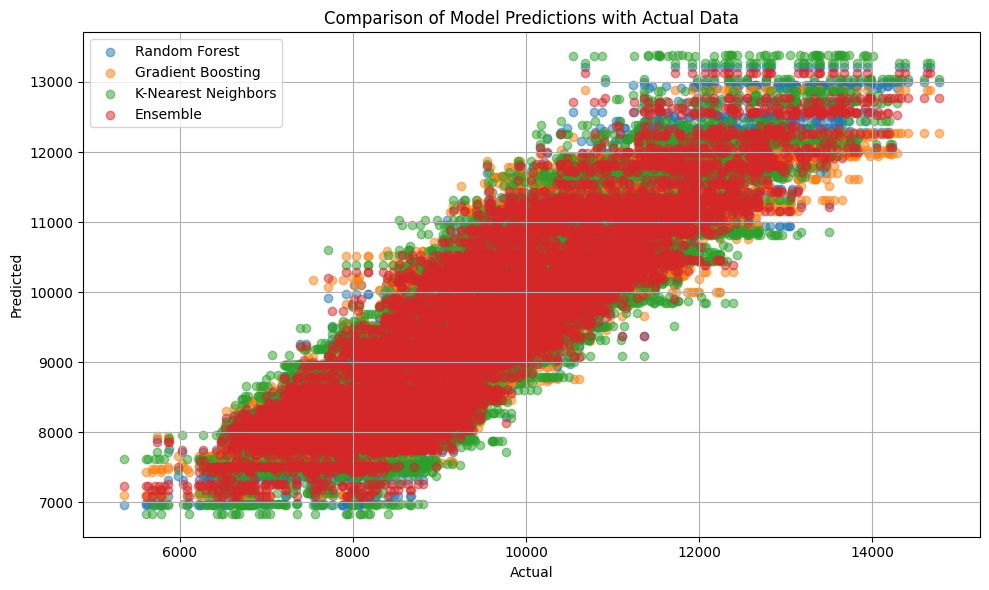

In [23]:

# Plotting
plt.figure(figsize=(10, 6))
for model in predictions_df.columns[:-1]:  # Exclude 'Actual' column
    plt.scatter(predictions_df['Actual'], predictions_df[model], label=model, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Comparison of Model Predictions with Actual Data')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()